In [1]:
import os, sys
import numpy as np               # for handling arrays
import pandas as pd
import h5py as h5                # for reading the COMPAS data
import time                      # for finding computation time
import shutil
import matplotlib.pyplot as plt  #for plotting
#plt.rcParams["text.usetex"] = True
compasRootDir = os.environ['COMPAS_ROOT_DIR']
sys.path.append(compasRootDir + 'postProcessing/PythonScripts')
from unsupported_utils.compasUtils import printCompasDetails,getEventHistory, getEventStrings 

sys.path.append(os.path.join('pyblish','plots'))
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "text.latex.preamble": r"\usepackage{amsmath}",
    "font.size": 16,  # Set the default font size
    "axes.titlesize": 18,  # Set the font size of the title
    "axes.labelsize": 18,  # Set the font size of the x and y labels
    "xtick.labelsize": 18,  # Set the font size of the x tick labels
    "ytick.labelsize": 18
})

Task 0

In [3]:
data=h5.File('Task-00/Detailed_Output/BSE_Detailed_Output_0.h5','r')
data1=h5.File('Task-00/Task-00.h5','r')
print(data1.keys())

<KeysViewHDF5 ['BSE_Common_Envelopes', 'BSE_Double_Compact_Objects', 'BSE_RLOF', 'BSE_Supernovae', 'BSE_System_Parameters', 'Run_Details']>


In [4]:
printCompasDetails(data1['BSE_System_Parameters'])

SEED,(units),1719569454,1719569455,1719569456,1719569457,1719569458,1719569459,1719569460,1719569461,1719569462,1719569463
CE_Alpha,-,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CH_on_MS(1),State,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CH_on_MS(2),State,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Eccentricity@ZAMS,-,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equilibrated_At_Birth,Event,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Error,-,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Evolution_Status,-,15.000000,12.000000,3.000000,3.000000,12.000000,17.000000,3.000000,14.000000,15.000000,3.000000
LBV_Factor,-,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000
Mass@ZAMS(1),Msol,5.877950,5.858195,6.032780,7.846078,5.770052,8.139829,9.267425,6.297932,5.128503,5.559713
Mass@ZAMS(2),Msol,1.603091,5.230000,0.149675,5.905694,5.770052,7.862371,7.940524,6.232290,1.518255,0.656648


In [5]:
printCompasDetails(data1['BSE_RLOF'])

SEED,(units),1719569455,1719569456,1719569458,1719569460,1719569460,1719569460,1719569462
Beta,-,1.000000,1.000000,1.000000e+00,1.000000,1.000000,4.843801e-23,1.000000e+00
CEE>MT,State,1.000000,1.000000,1.000000e+00,0.000000,0.000000,1.000000e+00,0.000000e+00
Eccentricity<MT,-,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
Eccentricity>MT,-,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
MT_Event_Counter,Count,1.000000,1.000000,1.000000e+00,1.000000,2.000000,3.000000e+00,1.000000e+00
Mass(1)<MT,Msol,5.731144,5.166946,5.770052e+00,9.197529,1.923831,1.234304e+00,1.696043e+00
Mass(1)>MT,Msol,1.492941,1.154024,5.770052e+00,1.940833,1.234305,1.234304e+00,1.084792e+00
Mass(2)<MT,Msol,5.223471,0.149675,5.770052e+00,7.910180,15.109714,1.182577e+01,1.518255e+00
Mass(2)>MT,Msol,5.223471,0.149675,5.770052e+00,15.166876,15.799240,5.298416e+00,2.129506e+00
MassTransferRateDonor,Msol/Myr,33733.777058,357966.321172,4.676436e-310,1258.863244,49119.457006,2.735807e+05,6.387505e+06


In [6]:
printCompasDetails(data1['BSE_Supernovae'])

SEED,(units),1719569457,1719569459,1719569459,1719569460,1719569461,1719569461
Applied_Kick_Magnitude(SN),kms^-1,0.0,96.982184,0.0,945.771975,0.0,0.0
ComponentSpeed(CP),kms^-1,0.071735,10.300972,186.022689,159.045474,0.069433,0.030889
ComponentSpeed(SN),kms^-1,0.071735,186.022689,10.300972,1870.873747,0.069433,0.030889
Drawn_Kick_Magnitude(SN),kms^-1,0.0,96.982184,0.0,945.771975,0.0,0.0
Eccentricity,-,0.017431,121.222108,121.222108,88.034902,0.016703,0.031809
Eccentricity<SN,-,0.0,0.0,121.222108,0.0,0.0,0.016703
Experienced_RLOF(SN),Event,0,0,0,1,0,0
Fallback_Fraction(SN),-,0.0,0.0,0.0,0.0,0.0,0.0
Is_Hydrogen_Poor(SN),State,1,0,1,1,1,1
Kick_Magnitude(uK),-,0.0,9.658676,NaN,9.705514,0.0,0.0


In [7]:
event_history=getEventHistory(h5.File('Task-00/Task-00.h5','r'))
event_strings=getEventStrings(h5.File('Task-00/Task-00.h5','r'))
with open('Task-00/events-history.txt','w') as file:
    for i in range(len(event_history[1])):
        print(event_history[0][i],end='\n',file=file)
        print(event_history[1][i],end='\n',file=file)
with open('Task-00/events-strings.txt','w') as file:
    for i in range(len(event_strings)):
        print(event_history[0][i],end='\n',file=file)
        print(event_strings[i],end='\n',file=file)

In [8]:
printCompasDetails(data1['BSE_Double_Compact_Objects'])

SEED,(units),1719569461
Coalescence_Time,Myr,6.737900e+24
Eccentricity@DCO,-,3.180940e-02
Mass(1),Msol,1.260000e+00
Mass(2),Msol,1.260000e+00
Merges_Hubble_Time,State,0.000000e+00
Record_Type,-,1.000000e+00
Recycled_NS(1),Event,0.000000e+00
Recycled_NS(2),Event,0.000000e+00
SemiMajorAxis@DCO,AU,3.026043e+03
Stellar_Type(1),-,1.300000e+01


TASK 4

In [2]:
consolidated_data = h5.File('./newTask-4/Task-4-dune.h5')
print(consolidated_data.keys())


<KeysViewHDF5 ['BSE_Common_Envelopes', 'BSE_Double_Compact_Objects', 'BSE_RLOF', 'BSE_Supernovae', 'BSE_System_Parameters', 'Run_Details']>


In [10]:
printCompasDetails(consolidated_data['BSE_System_Parameters'])

SEED,(units),30648,30649,30650,30651,30652,30653,30654,30655,30656,...,940647,940648,940649,940650,940651,940652,940653,940654,940655,940656
CH_on_MS(1),State,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CH_on_MS(2),State,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Eccentricity@ZAMS,-,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equilibrated_At_Birth,Event,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Error,-,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Evolution_Status,-,12.000000,17.000000,3.000000,3.000000,12.000000,3.000000,12.000000,17.000000,12.000000,...,15.000000,12.000000,17.000000,15.000000,15.000000,15.000000,12.000000,17.000000,12.000000,15.000000
Mass@ZAMS(1),Msol,8.417458,16.985295,16.296539,9.160753,5.089593,8.219969,8.307558,77.013126,9.107837,...,7.430343,20.241513,22.628819,6.664410,6.631427,5.888507,6.998237,11.410593,6.663571,6.508409
Mass@ZAMS(2),Msol,6.528234,11.599231,5.546217,5.930680,1.938438,6.617836,1.485416,15.815764,9.107837,...,1.810474,17.644008,11.492690,2.838489,1.486384,3.393154,4.277700,11.394802,3.512810,1.954867
Merger,Event,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
Merger_At_Birth,Event,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
event_history=getEventHistory(h5.File('newTask-4-out.h5','r'))
with open('newTask-4/events-history.txt','w') as file:
    for i in range(len(event_history[1])):
        print(event_history[0][i],end='\n',file=file)
        print(event_history[1][i],end='\n',file=file)

In [12]:
#printCompasDetails(consolidated_data['BSE_Double_Compact_Objects'])

In [3]:
DC = consolidated_data['BSE_Double_Compact_Objects']
seedsDC = DC['SEED'][()]
mass1 = DC['Mass(1)'][()]
mass2 = DC['Mass(2)'][()]
hubble = DC['Merges_Hubble_Time'][()]
hubble_merge = 0
for i in hubble:
    if i==1:
        hubble_merge+=1

syspar = consolidated_data['BSE_System_Parameters']
seeds_par = syspar['SEED'][()]
seeds_noDC_indices = []
mass1_syspar_zams = syspar['Mass@ZAMS(1)'][()]
mass2_syspar_zams = syspar['Mass@ZAMS(2)'][()]
sma = syspar['SemiMajorAxis@ZAMS'][()]

listseeds_par = list(seeds_par)
for i in range(len(seeds_par)):
    if seeds_par[i] not in seedsDC:
        seeds_noDC_indices.append(i)
mass1_noDC_zams,mass2_noDC_zams,sma_noDC = [],[],[]
mass1_DC_zams,mass2_DC_zams,sma_DC = [],[],[]

print(f"merges = {hubble_merge}")
#print(mass1)
#print(mass2)
print(f'Total no. of DCO = {len(seedsDC)}')
bh_bh_indices,bh_ns_indices,ns_ns_indices,bh_bh_hubble_indices,bh_ns_hubble_indices,ns_ns_hubble_indices    = [],[],[],[],[],[]
bh_bh_non_hubble_indices, bh_ns_non_hubble_indices, ns_ns_non_hubble_indices    = [],[],[]
for i in range(len(seedsDC)):
    # a NS in COMPAS is always below < 2.5 Msun, and that this value thus indicates the boundary between NSs and BHs. 
    # This does not have to be true in nature (nature might actually have a slightly different value for this boundary, for which a lot of active research is being conducted).
    index_val_in_seeds_par = (listseeds_par).index(seedsDC[i])
    mass1_DC_zams.append(mass1_syspar_zams[index_val_in_seeds_par])
    mass2_DC_zams.append(mass2_syspar_zams[index_val_in_seeds_par])
    sma_DC.append(sma[index_val_in_seeds_par])
    if mass1[i] > 2.5 and mass2[i] > 2.5:
        bh_bh_indices.append(i)
        if hubble[i] == 1:
            bh_bh_hubble_indices.append(i)
        else:
            bh_bh_non_hubble_indices.append(i)
    elif (mass1[i] > 2.5 and mass2[i] < 2.5) or (mass2[i] > 2.5 and mass1[i] < 2.5):
        bh_ns_indices.append(i)
        if hubble[i] == 1:
            bh_ns_hubble_indices.append(i)
        else:
            bh_ns_non_hubble_indices.append(i)
    elif ((0.7 < mass1[i] < 2.5) and (0.7 < mass2[i] < 2.5)):
        ns_ns_indices.append(i)
        if hubble[i] == 1:
            ns_ns_hubble_indices.append(i)
        else:
            ns_ns_non_hubble_indices.append(i)
print(f"Total number of binary black holes = {len(bh_bh_indices)}\n Total no. of BH-NS = {len(bh_ns_indices)}\n Total no. of NS-NS = {len(ns_ns_indices)}")

print(f"Total number of binary black holes that merge within a Hubble time = {len(bh_bh_hubble_indices)}\n Total no. of BH-NS that merge within a Hubble time = {len(bh_ns_hubble_indices)}\n Total no. of NS-NS that merge within a Hubble time = {len(ns_ns_hubble_indices)}")

merges = 481
Total no. of DCO = 4286
Total number of binary black holes = 3991
 Total no. of BH-NS = 261
 Total no. of NS-NS = 34
Total number of binary black holes that merge within a Hubble time = 334
 Total no. of BH-NS that merge within a Hubble time = 121
 Total no. of NS-NS that merge within a Hubble time = 26


In [4]:
# STORING MASSES, SMA OF NON-DCO BINARIES AT ZAMS
print(len(seeds_noDC_indices))
#print(seeds_noDC)
for i in seeds_noDC_indices:
    mass1_noDC_zams.append(mass1_syspar_zams[i])
    mass2_noDC_zams.append(mass2_syspar_zams[i])
    sma_noDC.append(sma[i])


95714


334
3657


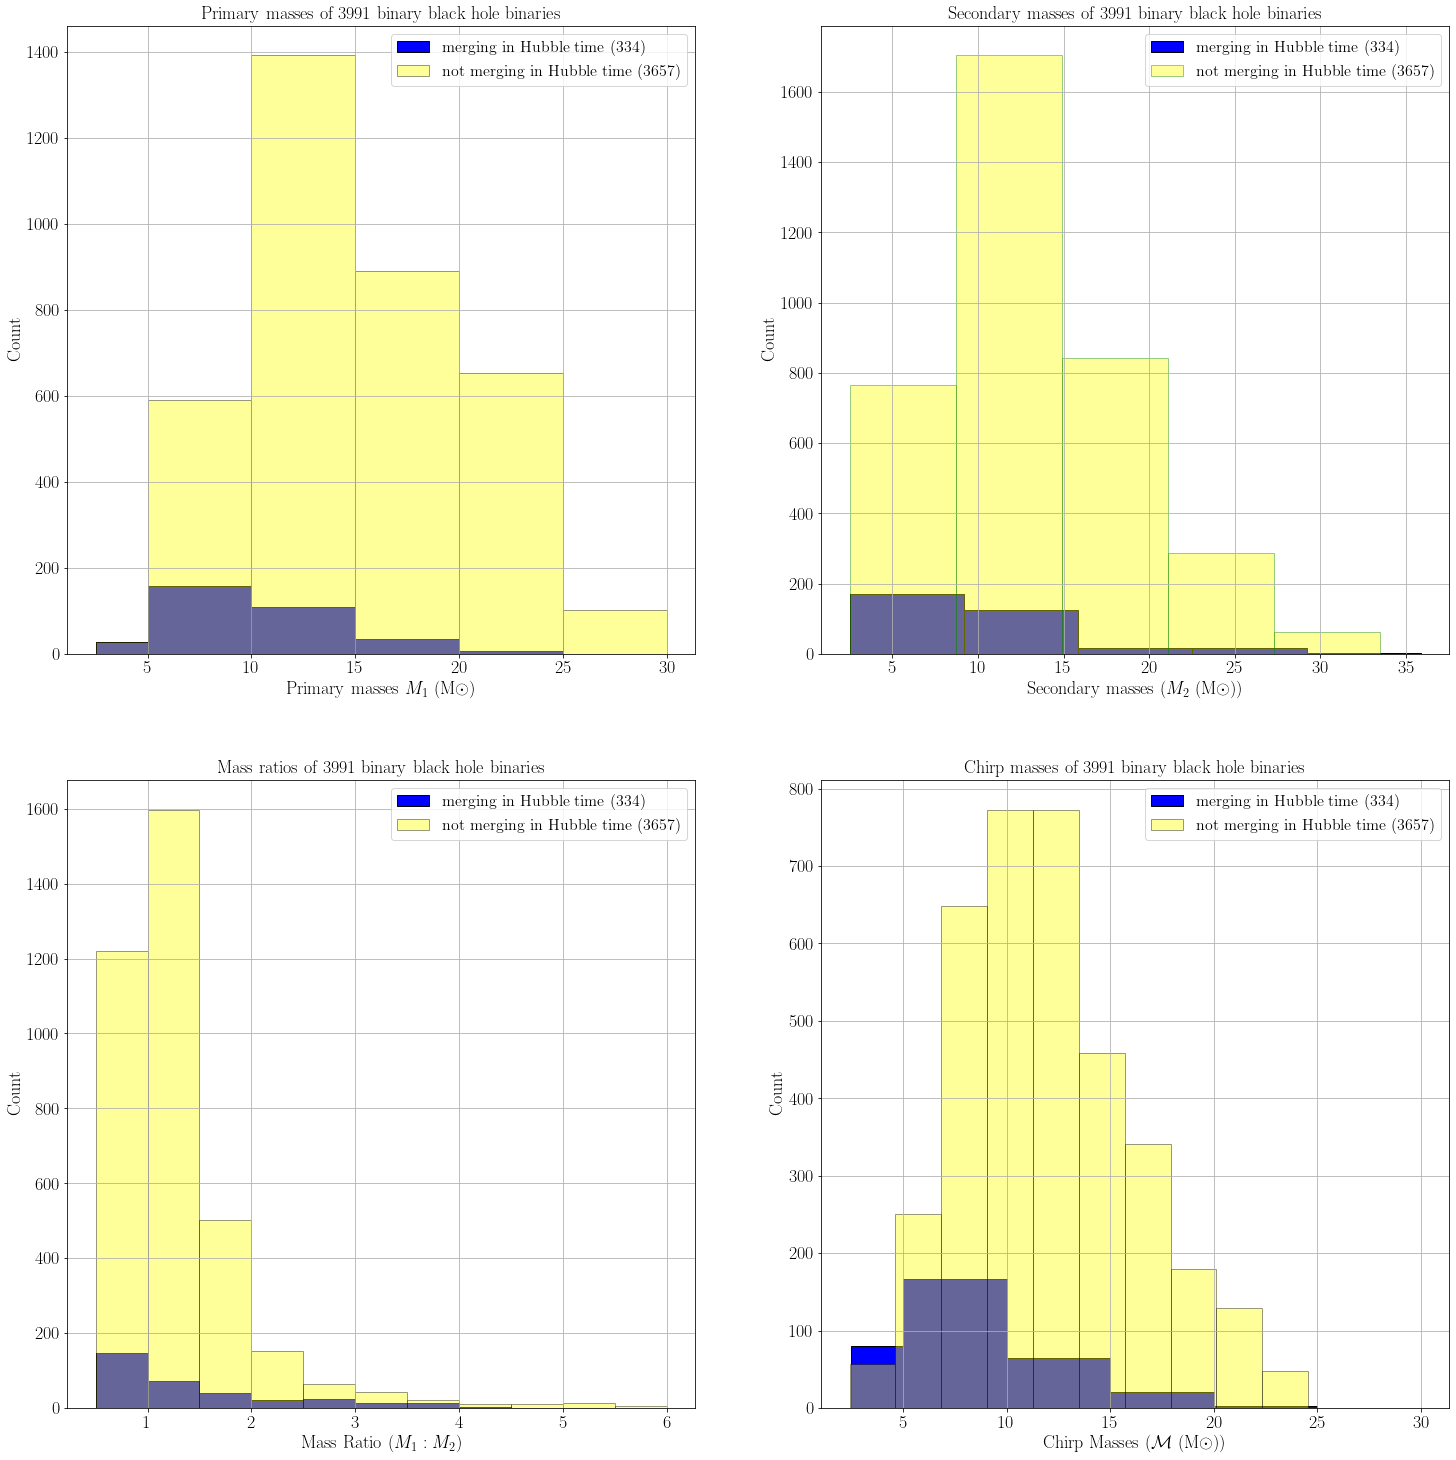

In [6]:
# BBH
mass1_bh_hubble = [mass1[i] for i in bh_bh_hubble_indices]
sma_bh_hubble = [sma[i] for i in bh_bh_hubble_indices]
sma_bh_non_hubble = [sma[i] for i in bh_bh_non_hubble_indices]
mass1_bh_non_hubble = [mass1[i] for i in bh_bh_non_hubble_indices]
mass2_bh_hubble = [mass2[i] for i in bh_bh_hubble_indices]
mass2_bh_non_hubble = [mass2[i] for i in bh_bh_non_hubble_indices]
#
fig, axs = plt.subplots(2, 2, figsize=(24, 24))
print(len(mass1_bh_hubble))
print(len(mass1_bh_non_hubble))
bin = [2.5, 5,10,15,20,25,30]
axs[0,0].hist(mass1_bh_hubble,alpha=1,label=f'merging in Hubble time ({len(bh_bh_hubble_indices)})',color='blue',edgecolor='black',bins=bin)
axs[0,0].hist(mass1_bh_non_hubble,alpha=0.4,label=f'not merging in Hubble time ({len(bh_bh_non_hubble_indices)})',color='yellow',edgecolor='black',bins=bin)
axs[0,0].legend()
axs[0,0].set_title(f'Primary masses of {len(bh_bh_indices)} binary black hole binaries')
axs[0,0].set_xlabel("Primary masses $M_1$ (M$\odot$)")
axs[0,0].set_ylabel("Count")
axs[0,0].grid(True)

axs[0,1].hist(mass2_bh_hubble,alpha=1,label=f'merging in Hubble time ({len(bh_bh_hubble_indices)})',color='blue',edgecolor='black',bins=5)
axs[0,1].hist(mass2_bh_non_hubble,alpha=0.4,label=f'not merging in Hubble time ({len(bh_bh_non_hubble_indices)})',color='yellow',edgecolor='green',bins=5)
axs[0,1].legend()
axs[0,1].set_title(f'Secondary masses of {len(bh_bh_indices)} binary black hole binaries')
axs[0,1].set_xlabel("Secondary masses ($M_2$ (M$\odot$))")
axs[0,1].set_ylabel("Count")
axs[0,1].grid(True)

mass_bin = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6]
mass_ratio_bh_bh_hubble=[mass1_bh_hubble[i]/mass2_bh_hubble[i] for i in range(0,len(bh_bh_hubble_indices))]
mass_ratio_bh_bh_non_hubble=[mass1_bh_non_hubble[i]/mass2_bh_non_hubble[i] for i in range(0,len(bh_bh_non_hubble_indices))]
axs[1,0].hist(mass_ratio_bh_bh_hubble,alpha=1,color='blue',edgecolor='black',bins = mass_bin,cumulative=False,label=f'merging in Hubble time ({len(bh_bh_hubble_indices)})')
axs[1,0].hist(mass_ratio_bh_bh_non_hubble,alpha=0.4,bins = mass_bin,color='yellow',edgecolor='black',label=f'not merging in Hubble time ({len(bh_bh_non_hubble_indices)})')
axs[1,0].set_title(f'Mass ratios of {len(bh_bh_indices)} binary black hole binaries')
axs[1,0].set_xlabel("Mass Ratio ($ M_1 : M_2$)")
axs[1,0].set_ylabel("Count")
axs[1,0].legend()
axs[1,0].grid(True)

chirp_mass_bh_bh_hubble = [((((mass1_bh_hubble[i])*(mass2_bh_hubble[i]))**0.6)/(((mass1_bh_hubble[i]+mass2_bh_hubble[i]))**0.2)) for i in range(len(mass1_bh_hubble))] 
chirp_mass_bh_bh_non_hubble = [((((mass1_bh_non_hubble[i])*(mass2_bh_non_hubble[i]))**0.6)/(((mass1_bh_non_hubble[i]+mass2_bh_non_hubble[i]))**0.2)) for i in range(len(mass1_bh_non_hubble))] 
axs[1,1].hist(chirp_mass_bh_bh_hubble,alpha=1,color='blue',bins=bin,edgecolor='black',label=f'merging in Hubble time ({len(bh_bh_hubble_indices)})')
axs[1,1].hist(chirp_mass_bh_bh_non_hubble,alpha=0.4,color='yellow',edgecolor='black',label=f'not merging in Hubble time ({len(bh_bh_non_hubble_indices)})')
axs[1,1].set_title(f'Chirp masses of {len(bh_bh_indices)} binary black hole binaries')
axs[1,1].set_xlabel("Chirp Masses ($\mathcal{M}$  (M$\odot$))")
axs[1,1].legend()
axs[1,1].set_ylabel("Count")
axs[1,1].grid(True)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
fig.savefig('./newTask-4/BBH.jpeg', dpi=300)
#fig.savefig('/home/rsgr/lukog/plots/task4/BBH.jpeg', dpi=300)

334
3657


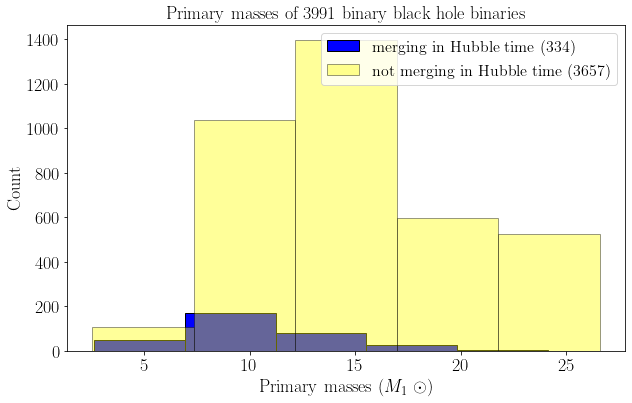

In [7]:
# histogram code

'''
histogram for primary masses in BH-BH
'''
mass1_bh_hubble = [mass1[i] for i in bh_bh_hubble_indices]
mass1_bh_non_hubble = [mass1[i] for i in bh_bh_non_hubble_indices]
mass2_bh_hubble = [mass2[i] for i in bh_bh_hubble_indices]
mass2_bh_non_hubble = [mass2[i] for i in bh_bh_non_hubble_indices]
#
print(len(mass1_bh_hubble))
print(len(mass1_bh_non_hubble))
plt.hist(mass1_bh_hubble,alpha=1,label=f'merging in Hubble time ({len(bh_bh_hubble_indices)})',color='blue',edgecolor='black',bins=5)
plt.hist(mass1_bh_non_hubble,alpha=0.4,label=f'not merging in Hubble time ({len(bh_bh_non_hubble_indices)})',color='yellow',edgecolor='black',bins=5)
plt.legend()
plt.title(f'Primary masses of {len(bh_bh_indices)} binary black hole binaries')
plt.xlabel("Primary masses ($M_1$ $\odot$)")
plt.ylabel("Count")
plt.savefig('./newTask-4/bbh/primaryBBH.jpeg',dpi=300)
plt.savefig('/home/rsgr/lukog/plots/task4/primaryBBH.jpeg',dpi=300)
plt.show()


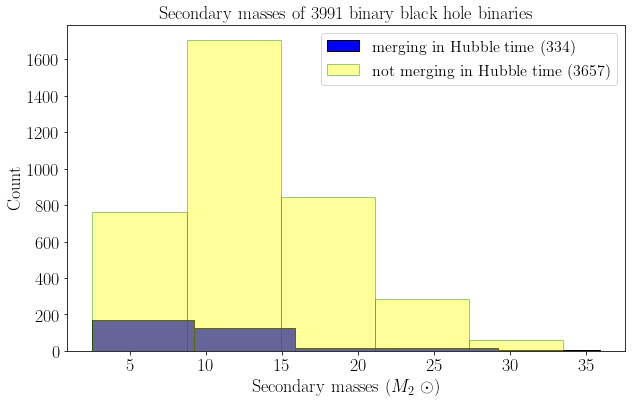

In [8]:
'''
histogram for secondary masses
'''
#
plt.hist(mass2_bh_hubble,alpha=1,label=f'merging in Hubble time ({len(bh_bh_hubble_indices)})',color='blue',edgecolor='black',bins=5)
plt.hist(mass2_bh_non_hubble,alpha=0.4,label=f'not merging in Hubble time ({len(bh_bh_non_hubble_indices)})',color='yellow',edgecolor='green',bins=5)
plt.legend()
plt.title(f'Secondary masses of {len(bh_bh_indices)} binary black hole binaries')
plt.xlabel("Secondary masses ($M_2$ $\odot$)")
plt.ylabel("Count")
plt.savefig('./newTask-4/bbh/secondaryBBH.jpeg',dpi=300)
plt.savefig('/home/rsgr/lukog/plots/task4/secondaryBBH.jpeg',dpi=300)
plt.show()


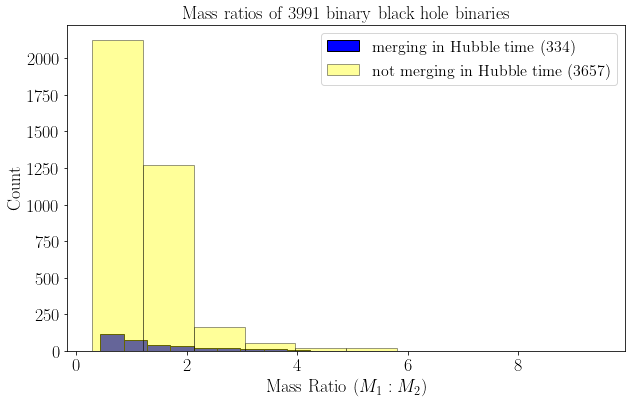

In [9]:
'''
histogram for mass ratios which is M1:M2
'''
mass_ratio_bh_bh_hubble=[mass1_bh_hubble[i]/mass2_bh_hubble[i] for i in range(0,len(bh_bh_hubble_indices))]

mass_ratio_bh_bh_non_hubble=[mass1_bh_non_hubble[i]/mass2_bh_non_hubble[i] for i in range(0,len(bh_bh_non_hubble_indices))]
#
plt.hist(mass_ratio_bh_bh_hubble,alpha=1,color='blue',edgecolor='black',label=f'merging in Hubble time ({len(bh_bh_hubble_indices)})')
plt.hist(mass_ratio_bh_bh_non_hubble,alpha=0.4,color='yellow',edgecolor='black',label=f'not merging in Hubble time ({len(bh_bh_non_hubble_indices)})')
plt.title(f'Mass ratios of {len(bh_bh_indices)} binary black hole binaries')
plt.xlabel("Mass Ratio ($ M_1 : M_2$)")
plt.ylabel("Count")
plt.legend()
plt.savefig('./newTask-4/bbh/mass-ratioBBH.jpeg',dpi=300)
plt.savefig('/home/rsgr/lukog/plots/task4/mass-ratioBBH.jpeg',dpi=300)
plt.show()

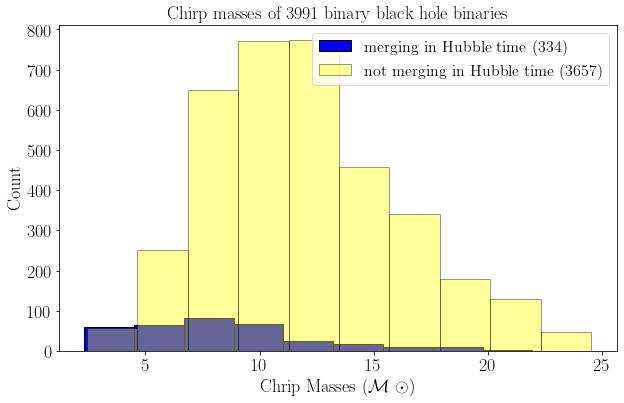

In [10]:
'''
histogram for chirp masses

POINTS TO BE NOTED IN REPORT:
1) chirp mass, M = (m1m2)^0.6 / (m1+m2)^0.2
2) chirp masses determine the GW frequency

ref: https://en.wikipedia.org/wiki/Chirp_mass
'''
chirp_mass_bh_bh_hubble = [((((mass1_bh_hubble[i])*(mass2_bh_hubble[i]))**0.6)/(((mass1_bh_hubble[i]+mass2_bh_hubble[i]))**0.2)) for i in range(len(mass1_bh_hubble))] # type: ignore
chirp_mass_bh_bh_non_hubble = [((((mass1_bh_non_hubble[i])*(mass2_bh_non_hubble[i]))**0.6)/(((mass1_bh_non_hubble[i]+mass2_bh_non_hubble[i]))**0.2)) for i in range(len(mass1_bh_non_hubble))] # type: ignore
#
plt.hist(chirp_mass_bh_bh_hubble,alpha=1,color='blue',edgecolor='black',label=f'merging in Hubble time ({len(bh_bh_hubble_indices)})')
plt.hist(chirp_mass_bh_bh_non_hubble,alpha=0.4,color='yellow',edgecolor='black',label=f'not merging in Hubble time ({len(bh_bh_non_hubble_indices)})')
plt.title(f'Chirp masses of {len(bh_bh_indices)} binary black hole binaries')
plt.xlabel("Chrip Masses ($\mathcal{M}$  $\odot$)")
plt.legend()
plt.ylabel("Count")
#plt.text('$\mathcal{M}$ = $\frac{({m_1}{m_2})^{0.6}} {{m_1+m_2}^0.2}')
plt.savefig('./newTask-4/bbh/chirp-massBBH.jpeg',dpi=300)
plt.savefig('/home/rsgr/lukog/plots/task4/chirp-massBBH.jpeg',dpi=300)
plt.show()

26
8
[2.5, 5, 10, 15, 20, 25, 30]


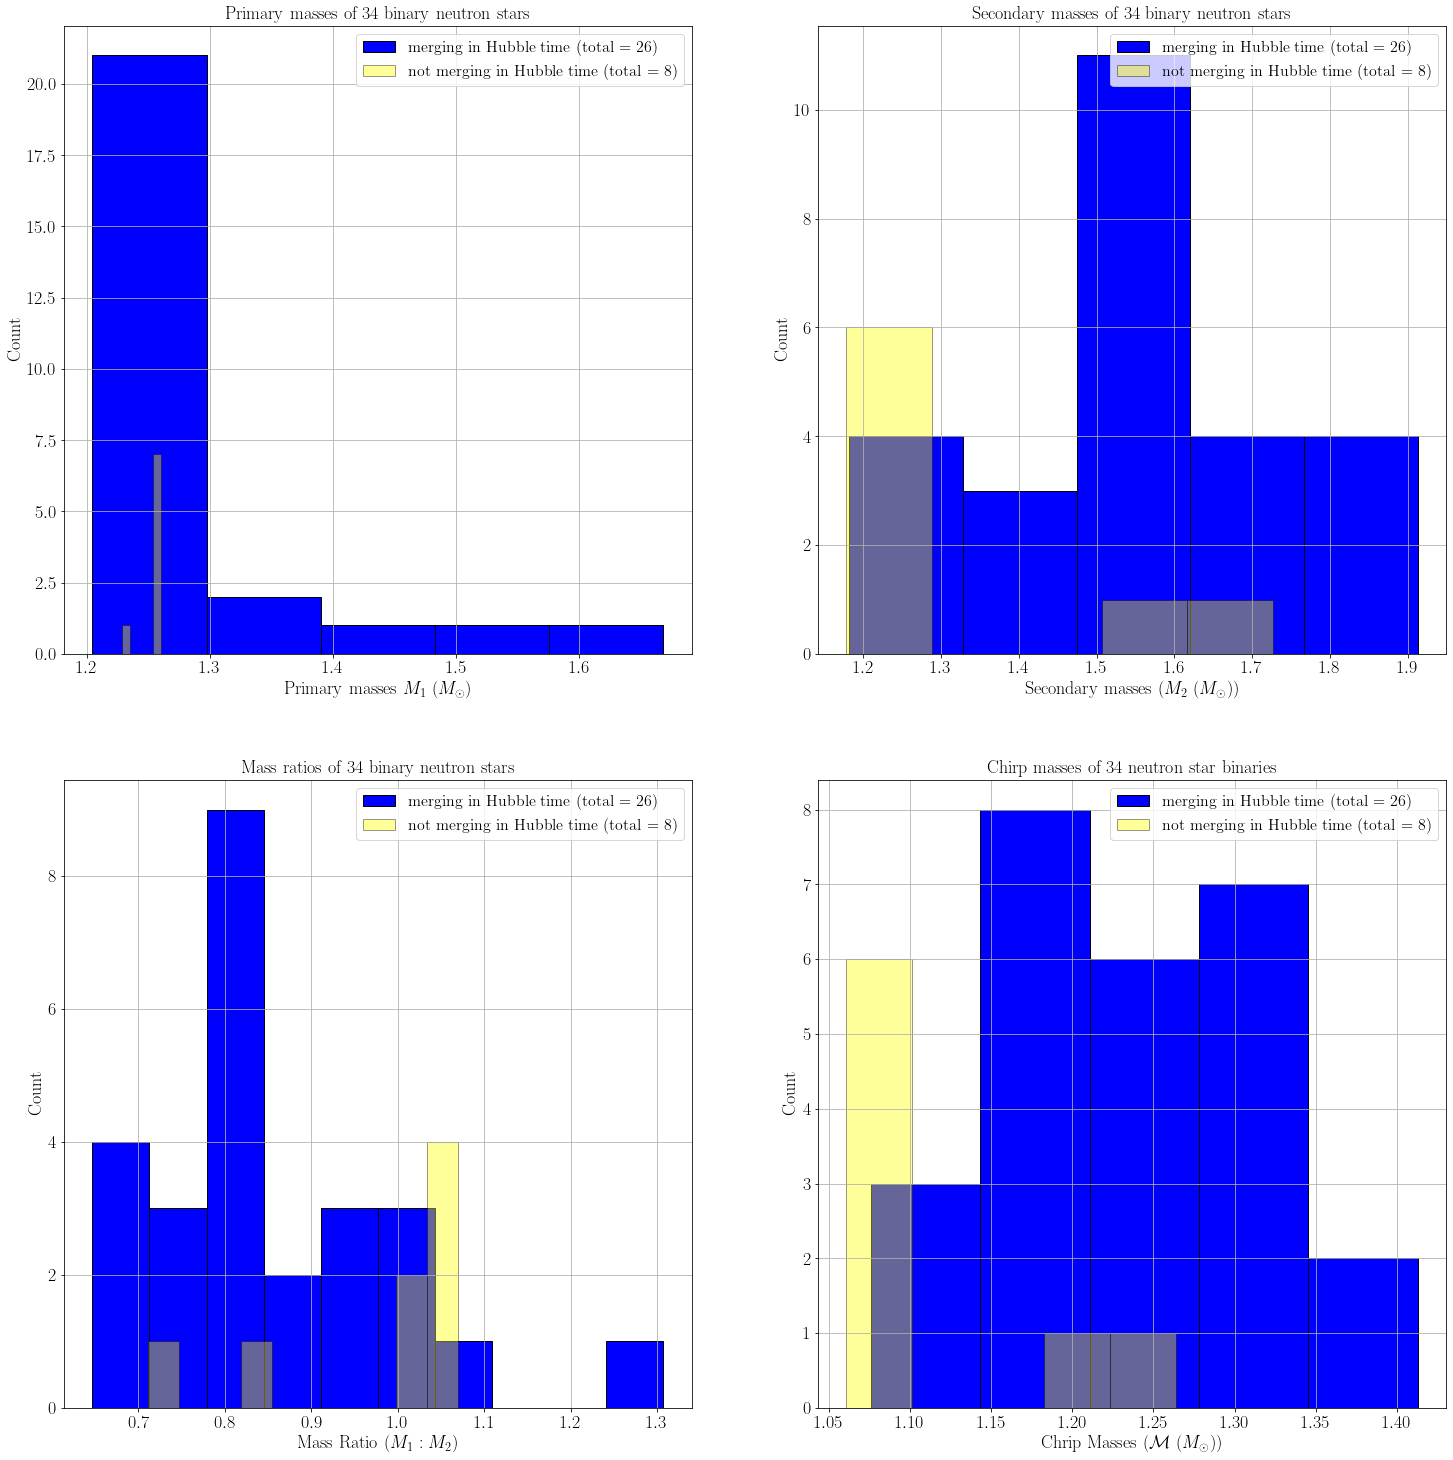

In [11]:
# BNS
fig, axs = plt.subplots(2, 2, figsize=(24, 24))
mass1_ns_hubble = [mass1[i] for i in ns_ns_hubble_indices]
mass2_ns_hubble = [mass2[i] for i in ns_ns_hubble_indices]
mass1_ns_non_hubble = [mass1[i] for i in ns_ns_non_hubble_indices]
mass2_ns_non_hubble = [mass2[i] for i in ns_ns_non_hubble_indices]
sma_ns_hubble = [sma[i] for i in ns_ns_hubble_indices]
sma_ns_non_hubble = [sma[i] for i in ns_ns_non_hubble_indices]
print(len(mass1_ns_hubble))
print(len(mass1_ns_non_hubble))
print(bin)
axs[0,0].hist(mass1_ns_hubble,alpha=1,color='blue',edgecolor='black',bins=5,label= f'merging in Hubble time (total = {len(ns_ns_hubble_indices)})')
axs[0,0].hist(mass1_ns_non_hubble,alpha=0.4,color='yellow',edgecolor='black',bins=5,label= f'not merging in Hubble time (total = {len(ns_ns_non_hubble_indices)})')
axs[0,0].set_title(f'Primary masses of {len(ns_ns_indices)} binary neutron stars')
axs[0,0].legend()
axs[0,0].set_xlabel("Primary masses $M_1$ ($M_\odot$)")
axs[0,0].set_ylabel("Count")
axs[0,0].grid(True)

axs[0,1].hist(mass2_ns_hubble,alpha=1,color='blue',edgecolor='black',bins=5,cumulative=False,label= f'merging in Hubble time (total = {len(ns_ns_hubble_indices)})')
axs[0,1].hist(mass2_ns_non_hubble,alpha=0.4,color='yellow',edgecolor='black',bins=5,cumulative=False,label= f'not merging in Hubble time (total = {len(ns_ns_non_hubble_indices)})')
#plt.title(f'Histogram of secondary masses of {len(ns_ns_indices)} binary neutron stars')
axs[0,1].set_xlabel("Secondary masses ($M_2$ ($M_\odot$))")
axs[0,1].legend()
axs[0,1].set_title(f'Secondary masses of {len(ns_ns_indices)} binary neutron stars')
axs[0,1].set_ylabel("Count")
axs[0,1].grid(True)

mass_ratio_ns_ns_hubble=[mass1_ns_hubble[i]/mass2_ns_hubble[i] for i in range(0,len(ns_ns_hubble_indices))]
mass_ratio_ns_ns_non_hubble=[mass1_ns_non_hubble[i]/mass2_ns_non_hubble[i] for i in range(0,len(ns_ns_non_hubble_indices))]
axs[1,0].hist(mass_ratio_ns_ns_hubble,alpha=1,color='blue',edgecolor='black',label= f'merging in Hubble time (total = {len(ns_ns_hubble_indices)})')
axs[1,0].hist(mass_ratio_ns_ns_non_hubble,alpha=0.4,color='yellow',edgecolor='black',label= f'not merging in Hubble time (total = {len(ns_ns_non_hubble_indices)})')
axs[1,0].set_title(f'Mass ratios of {len(ns_ns_indices)} binary neutron stars')
axs[1,0].legend()
axs[1,0].set_xlabel("Mass Ratio ($ M_1 : M_2$)")
axs[1,0].set_ylabel("Count")
axs[1,0].grid(True)

chirp_mass_ns_ns_hubble = [((((mass1_ns_hubble[i])*(mass2_ns_hubble[i]))**0.6)/(((mass1_ns_hubble[i]+mass2_ns_hubble[i]))**0.2)) for i in range(len(mass1_ns_hubble))]
chirp_mass_ns_ns_non_hubble = [((((mass1_ns_non_hubble[i])*(mass2_ns_non_hubble[i]))**0.6)/(((mass1_ns_non_hubble[i]+mass2_ns_non_hubble[i]))**0.2)) for i in range(len(mass1_ns_non_hubble))]
axs[1,1].hist(chirp_mass_ns_ns_hubble,alpha=1,color='blue',edgecolor='black',bins = 5,label= f'merging in Hubble time (total = {len(ns_ns_hubble_indices)})')
axs[1,1].hist(chirp_mass_ns_ns_non_hubble,alpha=0.4,color='yellow',edgecolor='black',bins = 5,label=f'not merging in Hubble time (total = {len(ns_ns_non_hubble_indices)})')
axs[1,1].legend()
axs[1,1].set_title(f'Chirp masses of {len(ns_ns_indices)} neutron star binaries')
axs[1,1].set_xlabel("Chrip Masses ($ \mathcal{M}$ ($M_\odot$))")
axs[1,1].set_ylabel("Count")
axs[1,1].grid(True)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
fig.savefig('./newTask-4/BNS.jpeg', dpi=300)
#plt.savefig('/home/rsgr/lukog/plots/task4/BNS.jpeg',dpi=300)

26
8


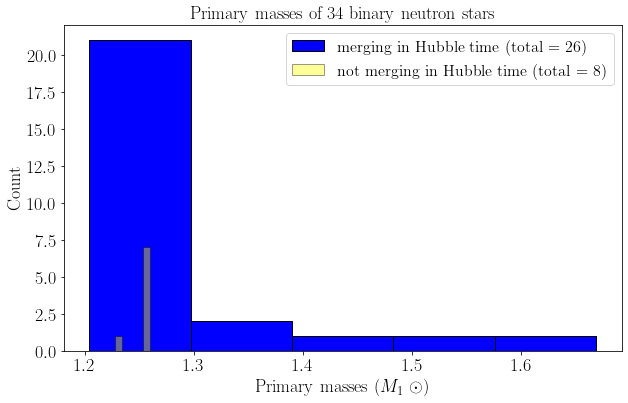

In [12]:
'''
histogram for primary masses in NS-NS
'''
mass1_ns_hubble = [mass1[i] for i in ns_ns_hubble_indices]

mass2_ns_hubble = [mass2[i] for i in ns_ns_hubble_indices]

mass1_ns_non_hubble = [mass1[i] for i in ns_ns_non_hubble_indices]

mass2_ns_non_hubble = [mass2[i] for i in ns_ns_non_hubble_indices]

print(len(mass1_ns_hubble))
print(len(mass1_ns_non_hubble))
#
plt.hist(mass1_ns_hubble,alpha=1,color='blue',edgecolor='black',bins=5,label= f'merging in Hubble time (total = {len(ns_ns_hubble_indices)})')
plt.hist(mass1_ns_non_hubble,alpha=0.4,color='yellow',edgecolor='black',bins=5,label= f'not merging in Hubble time (total = {len(ns_ns_non_hubble_indices)})')
plt.title(f'Primary masses of {len(ns_ns_indices)} binary neutron stars')
plt.legend()
plt.xlabel("Primary masses ($M_1$ $\odot$)")
plt.ylabel("Count")
plt.savefig('./newTask-4/bns/primaryBNS.jpeg',dpi=300)
plt.savefig('/home/rsgr/lukog/plots/task4/primaryBNS.jpeg',dpi=300)
plt.show()

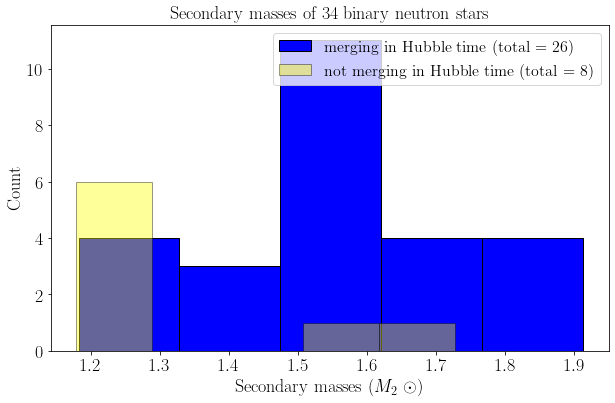

In [13]:
'''
histogram for secondary masses in NS-NS
'''
#
plt.hist(mass2_ns_hubble,alpha=1,color='blue',edgecolor='black',bins=5,cumulative=False,label= f'merging in Hubble time (total = {len(ns_ns_hubble_indices)})')

plt.hist(mass2_ns_non_hubble,alpha=0.4,color='yellow',edgecolor='black',bins=5,cumulative=False,label= f'not merging in Hubble time (total = {len(ns_ns_non_hubble_indices)})')
#plt.title(f'Histogram of secondary masses of {len(ns_ns_indices)} binary neutron stars')
plt.xlabel("Secondary masses ($M_2$ $\odot$)")
plt.legend()
plt.title(f'Secondary masses of {len(ns_ns_indices)} binary neutron stars')
plt.savefig('./newTask-4/bns/secondaryBNS.jpeg',dpi=300)
plt.savefig('/home/rsgr/lukog/plots/task4/secondaryBNS.jpeg',dpi=300)
plt.ylabel("Count")
plt.show()

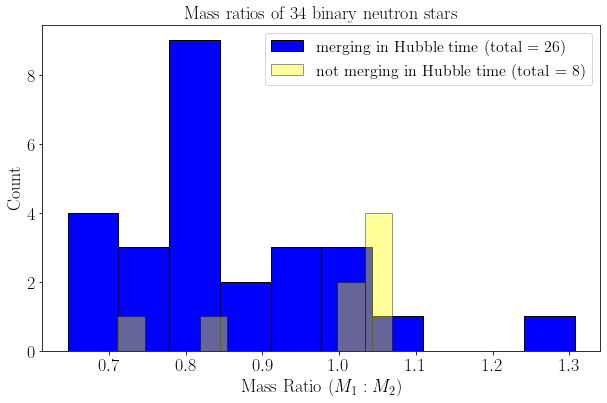

In [14]:
'''
histogram for mass ratios in NS-NS binaries which is M1:M2
'''
#
mass_ratio_ns_ns_hubble=[mass1_ns_hubble[i]/mass2_ns_hubble[i] for i in range(0,len(ns_ns_hubble_indices))]
mass_ratio_ns_ns_non_hubble=[mass1_ns_non_hubble[i]/mass2_ns_non_hubble[i] for i in range(0,len(ns_ns_non_hubble_indices))]
plt.hist(mass_ratio_ns_ns_hubble,alpha=1,color='blue',edgecolor='black',label= f'merging in Hubble time (total = {len(ns_ns_hubble_indices)})')
plt.hist(mass_ratio_ns_ns_non_hubble,alpha=0.4,color='yellow',edgecolor='black',label= f'not merging in Hubble time (total = {len(ns_ns_non_hubble_indices)})')
plt.title(f'Mass ratios of {len(ns_ns_indices)} binary neutron stars')
plt.legend()
plt.xlabel("Mass Ratio ($ M_1 : M_2$)")
plt.ylabel("Count")
plt.savefig('./newTask-4/bns/mass-ratioBNS.jpeg',dpi=300)
plt.savefig('/home/rsgr/lukog/plots/task4/mass-ratioBNS.jpeg',dpi=300)
plt.show()

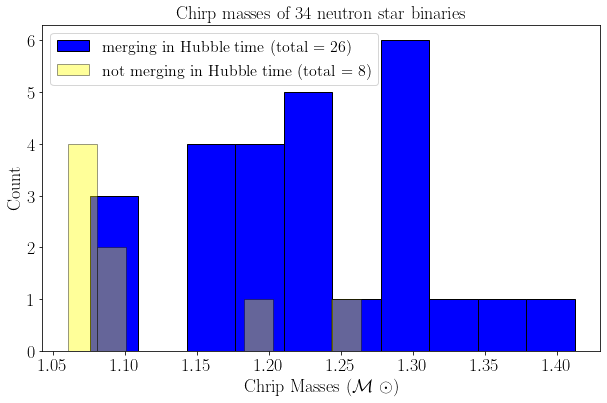

In [15]:
'''
histogram of chirp masses in NS-NS binaries
'''

chirp_mass_ns_ns_hubble = [((((mass1_ns_hubble[i])*(mass2_ns_hubble[i]))**0.6)/(((mass1_ns_hubble[i]+mass2_ns_hubble[i]))**0.2)) for i in range(len(mass1_ns_hubble))]

chirp_mass_ns_ns_non_hubble = [((((mass1_ns_non_hubble[i])*(mass2_ns_non_hubble[i]))**0.6)/(((mass1_ns_non_hubble[i]+mass2_ns_non_hubble[i]))**0.2)) for i in range(len(mass1_ns_non_hubble))]
#
plt.hist(chirp_mass_ns_ns_hubble,alpha=1,color='blue',edgecolor='black',label= f'merging in Hubble time (total = {len(ns_ns_hubble_indices)})')
plt.hist(chirp_mass_ns_ns_non_hubble,alpha=0.4,color='yellow',edgecolor='black',label=f'not merging in Hubble time (total = {len(ns_ns_non_hubble_indices)})')
plt.legend()
plt.title(f'Chirp masses of {len(ns_ns_indices)} neutron star binaries')
plt.xlabel("Chrip Masses ($ \mathcal{M}$ $\odot$)")
plt.ylabel("Count")
plt.savefig('./newTask-4/bns/chirp-massBNS.jpeg',dpi=300)
plt.savefig('/home/rsgr/lukog/plots/task4/chirp-massBNS.jpeg',dpi=300)
plt.show()

121
140


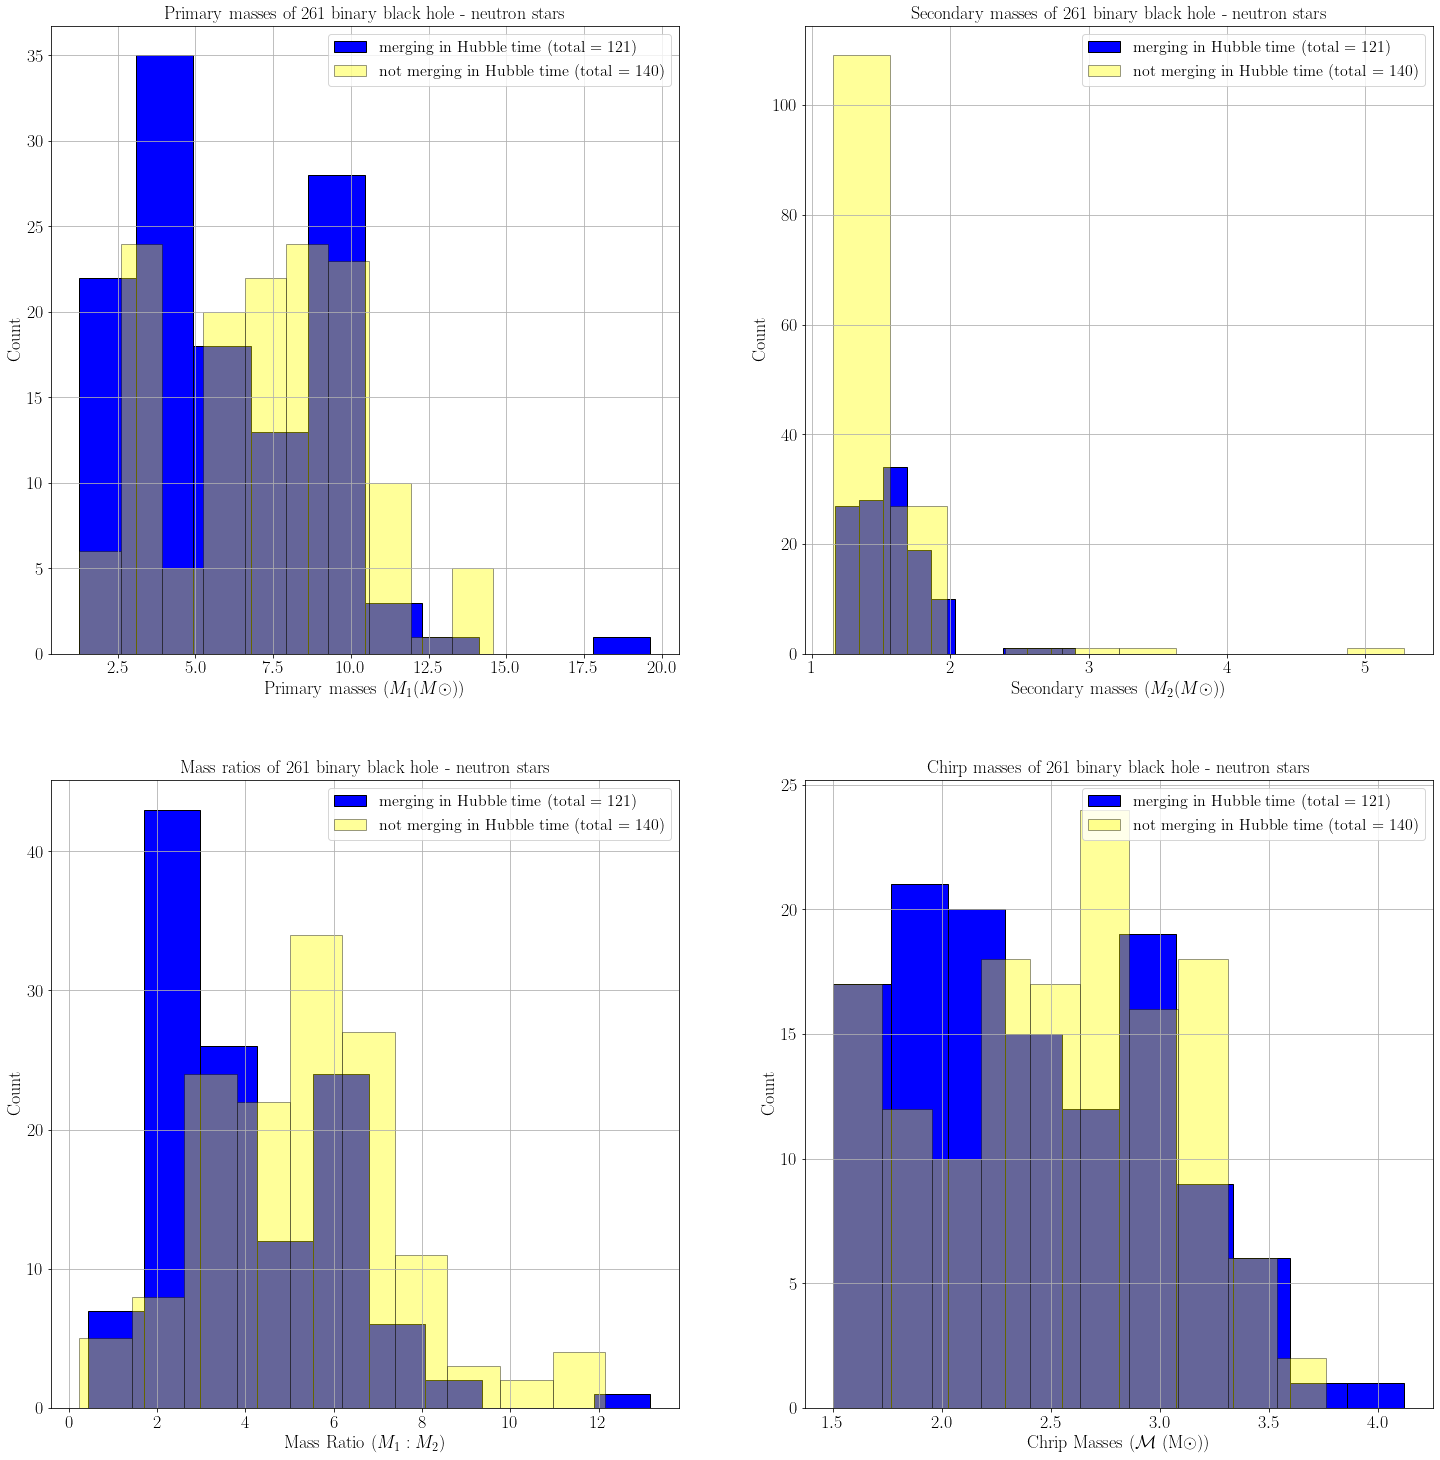

In [16]:
# BH-NS
fig, axs = plt.subplots(2, 2, figsize=(24, 24))
mass1_bh_ns_hubble = [mass1[i] for i in bh_ns_hubble_indices]
mass2_bh_ns_hubble = [mass2[i] for i in bh_ns_hubble_indices]
mass1_bh_ns_non_hubble = [mass1[i] for i in bh_ns_non_hubble_indices]
mass2_bh_ns_non_hubble = [mass2[i] for i in bh_ns_non_hubble_indices]
sma_bh_ns_hubble = [sma[i] for i in bh_ns_hubble_indices]
sma_bh_ns_non_hubble = [sma[i] for i in bh_ns_non_hubble_indices]
print(len(mass1_bh_ns_hubble))
print(len(mass1_bh_ns_non_hubble))
axs[0,0].hist(mass1_bh_ns_hubble,alpha=1,color='blue',edgecolor='black',label=f'merging in Hubble time (total = {len(bh_ns_hubble_indices)})')
axs[0,0].hist(mass1_bh_ns_non_hubble,alpha=0.4,color='yellow',edgecolor='black',label=f'not merging in Hubble time (total = {len(bh_ns_non_hubble_indices)})')
axs[0,0].set_title(f'Primary masses of {len(bh_ns_indices)} binary black hole - neutron stars')
axs[0,0].set_xlabel("Primary masses ($M_1 (M\odot)$)")
axs[0,0].legend()
axs[0,0].set_ylabel("Count")
axs[0,0].grid(True)

axs[0,1].hist(mass2_bh_ns_hubble,alpha=1,color='blue',edgecolor='black',label=f'merging in Hubble time (total = {len(bh_ns_hubble_indices)})')
axs[0,1].hist(mass2_bh_ns_non_hubble,alpha=0.4,color='yellow',edgecolor='black',label=f'not merging in Hubble time (total = {len(bh_ns_non_hubble_indices)})')
axs[0,1].set_title(f'Secondary masses of {len(bh_ns_indices)} binary black hole - neutron stars')
axs[0,1].set_xlabel("Secondary masses ($M_2 (M\odot)$)")
axs[0,1].legend()
axs[0,1].set_ylabel("Count")
axs[0,1].grid(True)

mass_ratio_bh_ns_hubble=[mass1_bh_ns_hubble[i]/mass2_bh_ns_hubble[i] for i in range(0,len(bh_ns_hubble_indices))]
mass_ratio_bh_ns_non_hubble=[mass1_bh_ns_non_hubble[i]/mass2_bh_ns_non_hubble[i] for i in range(0,len(bh_ns_non_hubble_indices))]
axs[1,0].hist(mass_ratio_bh_ns_hubble,alpha=1,color='blue',edgecolor='black',label=f'merging in Hubble time (total = {len(bh_ns_hubble_indices)})')
axs[1,0].hist(mass_ratio_bh_ns_non_hubble,alpha=0.4,color='yellow',edgecolor='black',label=f'not merging in Hubble time (total = {len(bh_ns_non_hubble_indices)})')
axs[1,0].set_title(f'Mass ratios of {len(bh_ns_indices)} binary black hole - neutron stars')
axs[1,0].set_xlabel("Mass Ratio ($M_1 : M_2$)")
axs[1,0].legend()
axs[1,0].set_ylabel("Count")
axs[1,0].grid(True)

chirp_mass_bh_ns_hubble = [((((mass1_bh_ns_hubble[i])*(mass2_bh_ns_hubble[i]))**0.6)/(((mass1_bh_ns_hubble[i]+mass2_bh_ns_hubble[i]))**0.2)) for i in range(len(mass1_bh_ns_hubble))]
chirp_mass_bh_ns_non_hubble = [((((mass1_bh_ns_non_hubble[i])*(mass2_bh_ns_non_hubble[i]))**0.6)/(((mass1_bh_ns_non_hubble[i]+mass2_bh_ns_non_hubble[i]))**0.2)) for i in range(len(mass1_bh_ns_non_hubble))]
axs[1,1].hist(chirp_mass_bh_ns_hubble,alpha=1,color='blue',edgecolor='black',label= f'merging in Hubble time (total = {len(bh_ns_hubble_indices)})')
axs[1,1].hist(chirp_mass_bh_ns_non_hubble,alpha=0.4,color='yellow',edgecolor='black',label=f'not merging in Hubble time (total = {len(bh_ns_non_hubble_indices)})')
axs[1,1].legend()
axs[1,1].set_title(f'Chirp masses of {len(bh_ns_indices)} binary black hole - neutron stars')
axs[1,1].set_xlabel("Chrip Masses ($ \mathcal{M}$ (M$\odot$))")
axs[1,1].set_ylabel("Count")
axs[1,1].grid(True)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
fig.savefig('./newTask-4/BH-NS.jpeg', dpi=300)
#plt.savefig('/home/rsgr/lukog/plots/task4/BH-NS.jpeg',dpi=300)


121
140


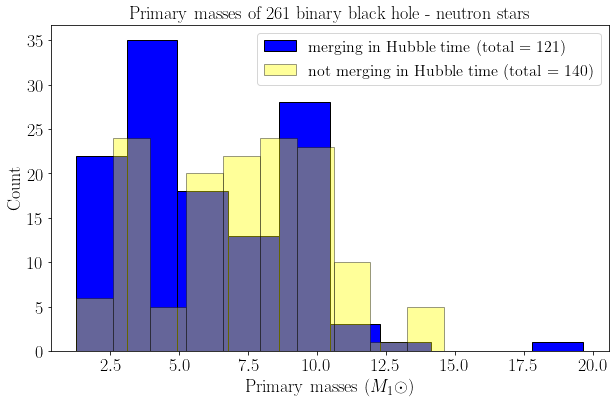

In [17]:
'''
histogram for primary masses in BH-NS
'''
mass1_bh_ns_hubble = [mass1[i] for i in bh_ns_hubble_indices]
mass2_bh_ns_hubble = [mass2[i] for i in bh_ns_hubble_indices]
#
mass1_bh_ns_non_hubble = [mass1[i] for i in bh_ns_non_hubble_indices]
mass2_bh_ns_non_hubble = [mass2[i] for i in bh_ns_non_hubble_indices]
print(len(mass1_bh_ns_hubble))
print(len(mass1_bh_ns_non_hubble))
plt.hist(mass1_bh_ns_hubble,alpha=1,color='blue',edgecolor='black',label=f'merging in Hubble time (total = {len(bh_ns_hubble_indices)})')
plt.hist(mass1_bh_ns_non_hubble,alpha=0.4,color='yellow',edgecolor='black',label=f'not merging in Hubble time (total = {len(bh_ns_non_hubble_indices)})')
plt.title(f'Primary masses of {len(bh_ns_indices)} binary black hole - neutron stars')
plt.xlabel("Primary masses ($M_1\odot$)")
plt.legend()
plt.ylabel("Count")
plt.savefig('./newTask-4/bh-ns/primaryBHNS.jpeg',dpi=300)
plt.savefig('./newTask-4/bbh/primaryHNS.jpeg',dpi=300)

plt.show()

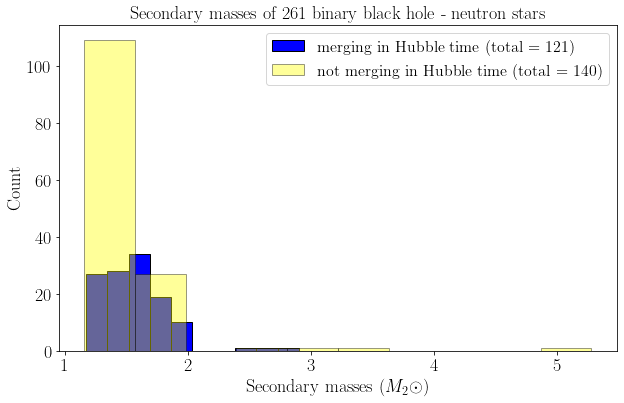

In [18]:
#
plt.hist(mass2_bh_ns_hubble,alpha=1,color='blue',edgecolor='black',label=f'merging in Hubble time (total = {len(bh_ns_hubble_indices)})')
plt.hist(mass2_bh_ns_non_hubble,alpha=0.4,color='yellow',edgecolor='black',label=f'not merging in Hubble time (total = {len(bh_ns_non_hubble_indices)})')
plt.title(f'Secondary masses of {len(bh_ns_indices)} binary black hole - neutron stars')
plt.xlabel("Secondary masses ($M_2 \odot$)")
plt.legend()
plt.ylabel("Count")
plt.savefig('./newTask-4/bh-ns/secondaryBHNS.jpeg',dpi=300)
plt.savefig('/home/rsgr/lukog/plots/task4/secondaryBHNS.jpeg',dpi=300)
plt.show()

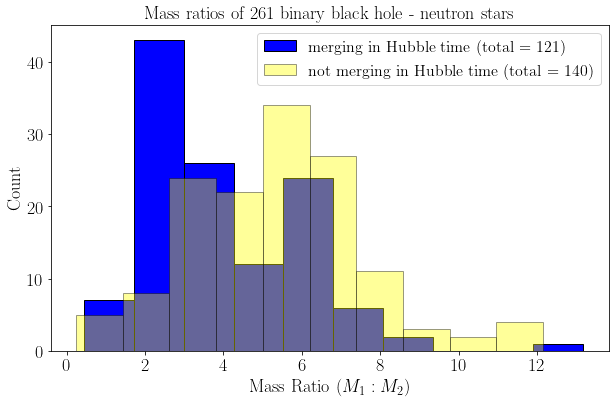

In [19]:
'''
histogram for mass ratios which is M1:M2
'''
#
mass_ratio_bh_ns_hubble=[mass1_bh_ns_hubble[i]/mass2_bh_ns_hubble[i] for i in range(0,len(bh_ns_hubble_indices))]
mass_ratio_bh_ns_non_hubble=[mass1_bh_ns_non_hubble[i]/mass2_bh_ns_non_hubble[i] for i in range(0,len(bh_ns_non_hubble_indices))]
plt.hist(mass_ratio_bh_ns_hubble,alpha=1,color='blue',edgecolor='black',label=f'merging in Hubble time (total = {len(bh_ns_hubble_indices)})')
plt.hist(mass_ratio_bh_ns_non_hubble,alpha=0.4,color='yellow',edgecolor='black',label=f'not merging in Hubble time (total = {len(bh_ns_non_hubble_indices)})')
plt.title(f'Mass ratios of {len(bh_ns_indices)} binary black hole - neutron stars')
plt.xlabel("Mass Ratio ($M_1 : M_2$)")
plt.legend()
plt.ylabel("Count")
plt.savefig('./newTask-4/bh-ns/mass-ratioBHNS.jpeg',dpi=300)

plt.savefig('/home/rsgr/lukog/plots/task4/mass-ratioBHNS.jpeg',dpi=300)
plt.show()

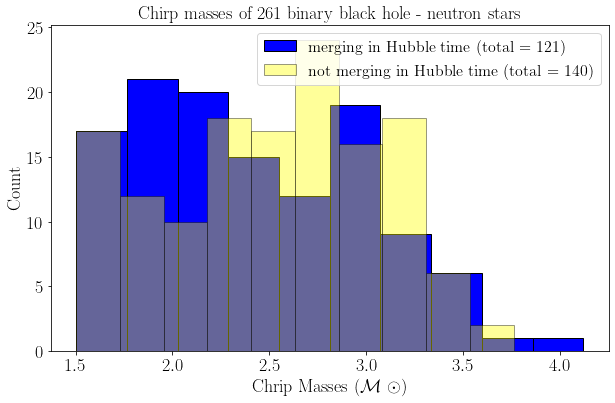

In [20]:
'''
histogram of chirp masses in BH-NS binaries
'''

chirp_mass_bh_ns_hubble = [((((mass1_bh_ns_hubble[i])*(mass2_bh_ns_hubble[i]))**0.6)/(((mass1_bh_ns_hubble[i]+mass2_bh_ns_hubble[i]))**0.2)) for i in range(len(mass1_bh_ns_hubble))]

chirp_mass_bh_ns_non_hubble = [((((mass1_bh_ns_non_hubble[i])*(mass2_bh_ns_non_hubble[i]))**0.6)/(((mass1_bh_ns_non_hubble[i]+mass2_bh_ns_non_hubble[i]))**0.2)) for i in range(len(mass1_bh_ns_non_hubble))]
#
plt.hist(chirp_mass_bh_ns_hubble,alpha=1,color='blue',edgecolor='black',label= f'merging in Hubble time (total = {len(bh_ns_hubble_indices)})')
plt.hist(chirp_mass_bh_ns_non_hubble,alpha=0.4,color='yellow',edgecolor='black',label=f'not merging in Hubble time (total = {len(bh_ns_non_hubble_indices)})')
plt.legend()
plt.title(f'Chirp masses of {len(bh_ns_indices)} binary black hole - neutron stars')
plt.xlabel("Chrip Masses ($ \mathcal{M}$ $\odot$)")
plt.ylabel("Count")
plt.savefig('./newTask-4/bh-ns/chirp-massBHNS.jpeg',dpi=300)

plt.savefig('/home/rsgr/lukog/plots/task4/chirp-massBHNS.jpeg',dpi=300)
plt.show()

In [21]:
#printCompasDetails(consolidated_data['BSE_Supernovae'])


In [22]:
# TO BE DELETED
DCs = consolidated_data['BSE_Double_Compact_Objects']
seedsDC       = DCs['SEED'][()]
SNs = consolidated_data['BSE_Supernovae']
seedsSn = SNs['SEED'][()]
#print(seedsDC)
# finding number of black hole binaries
print(1719766379 in seedsDC )
print(1719766379 in seedsSn )
SN_mass = SNs['Mass(SN)'][()] # contains mass of each Compact object during supernova. So, T-O-V limit of 3-4 solar masses is what we should take. 
# the limit is about 2.17 - 2.9 solar masses. SO, take it to be 3 solar masses in this case
print(len(SN_mass))
BH_masses_before_BH =[]
for i in SN_mass:
    if i>2.2:
        BH_masses_before_BH.append(i)
print(f"Total number of black holes formed = {len(BH_masses_before_BH)}")
count=0


"""for i in range(len(SN_mass)):
    if 2.2<SN_mass[i]<2.6:
        print((seedsSn[i], SN_mass[i]),end=', ')
        count+=1
print(count)"""

False
False
54442
Total number of black holes formed = 19778


"for i in range(len(SN_mass)):\n    if 2.2<SN_mass[i]<2.6:\n        print((seedsSn[i], SN_mass[i]),end=', ')\n        count+=1\nprint(count)"

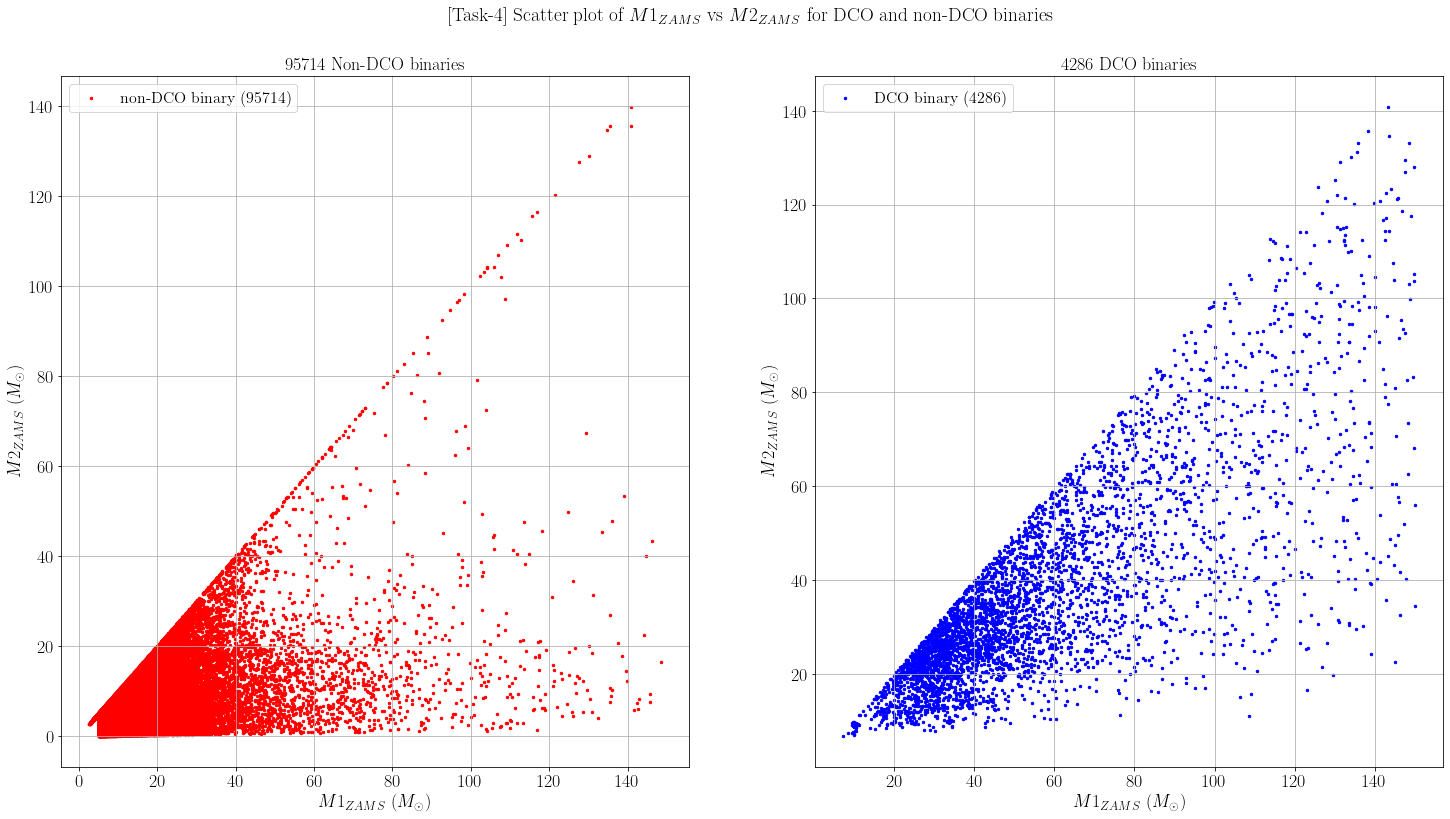

In [23]:
# PLOTTING M1@ZAMS VS M2@ZAMS
fig, axs = plt.subplots(1, 2, figsize=(24, 12))
axs[0].scatter(mass1_noDC_zams,mass2_noDC_zams, c='red', label=f'non-DCO binary ({len(seeds_noDC_indices)})',s=6)
axs[0].set_xlabel('$M1_{ZAMS}$ ($M_\odot$)')
axs[0].set_ylabel('$M2_{ZAMS}$ ($M_\odot$)')
axs[0].legend()
axs[0].set_title(f'{len(seeds_noDC_indices)} Non-DCO binaries')
axs[0].grid(True)

axs[1].scatter(mass1_DC_zams,mass2_DC_zams, c='blue', label=f'DCO binary ({len(seedsDC)})',s=6)
axs[1].set_xlabel('$M1_{ZAMS}$ ($M_\odot$)')
axs[1].set_ylabel('$M2_{ZAMS}$ ($M_\odot$)')
axs[1].legend()
axs[1].set_title(f'{len(seedsDC)} DCO binaries')
axs[1].grid(True)
fig.suptitle('[Task-4]   Scatter plot of $M1_{ZAMS}$ vs $M2_{ZAMS}$ for DCO and non-DCO binaries')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
fig.savefig('./newTask-4/M1_vs_M2_ZAMS_subplots_DCO_AND_NON-DCO.jpeg', dpi=300)

fig.savefig('/home/rsgr/lukog/plots/task4/M1_vs_M2_ZAMS_subplots_DCO_AND_NON-DCO.jpeg', dpi=300)
plt.show()

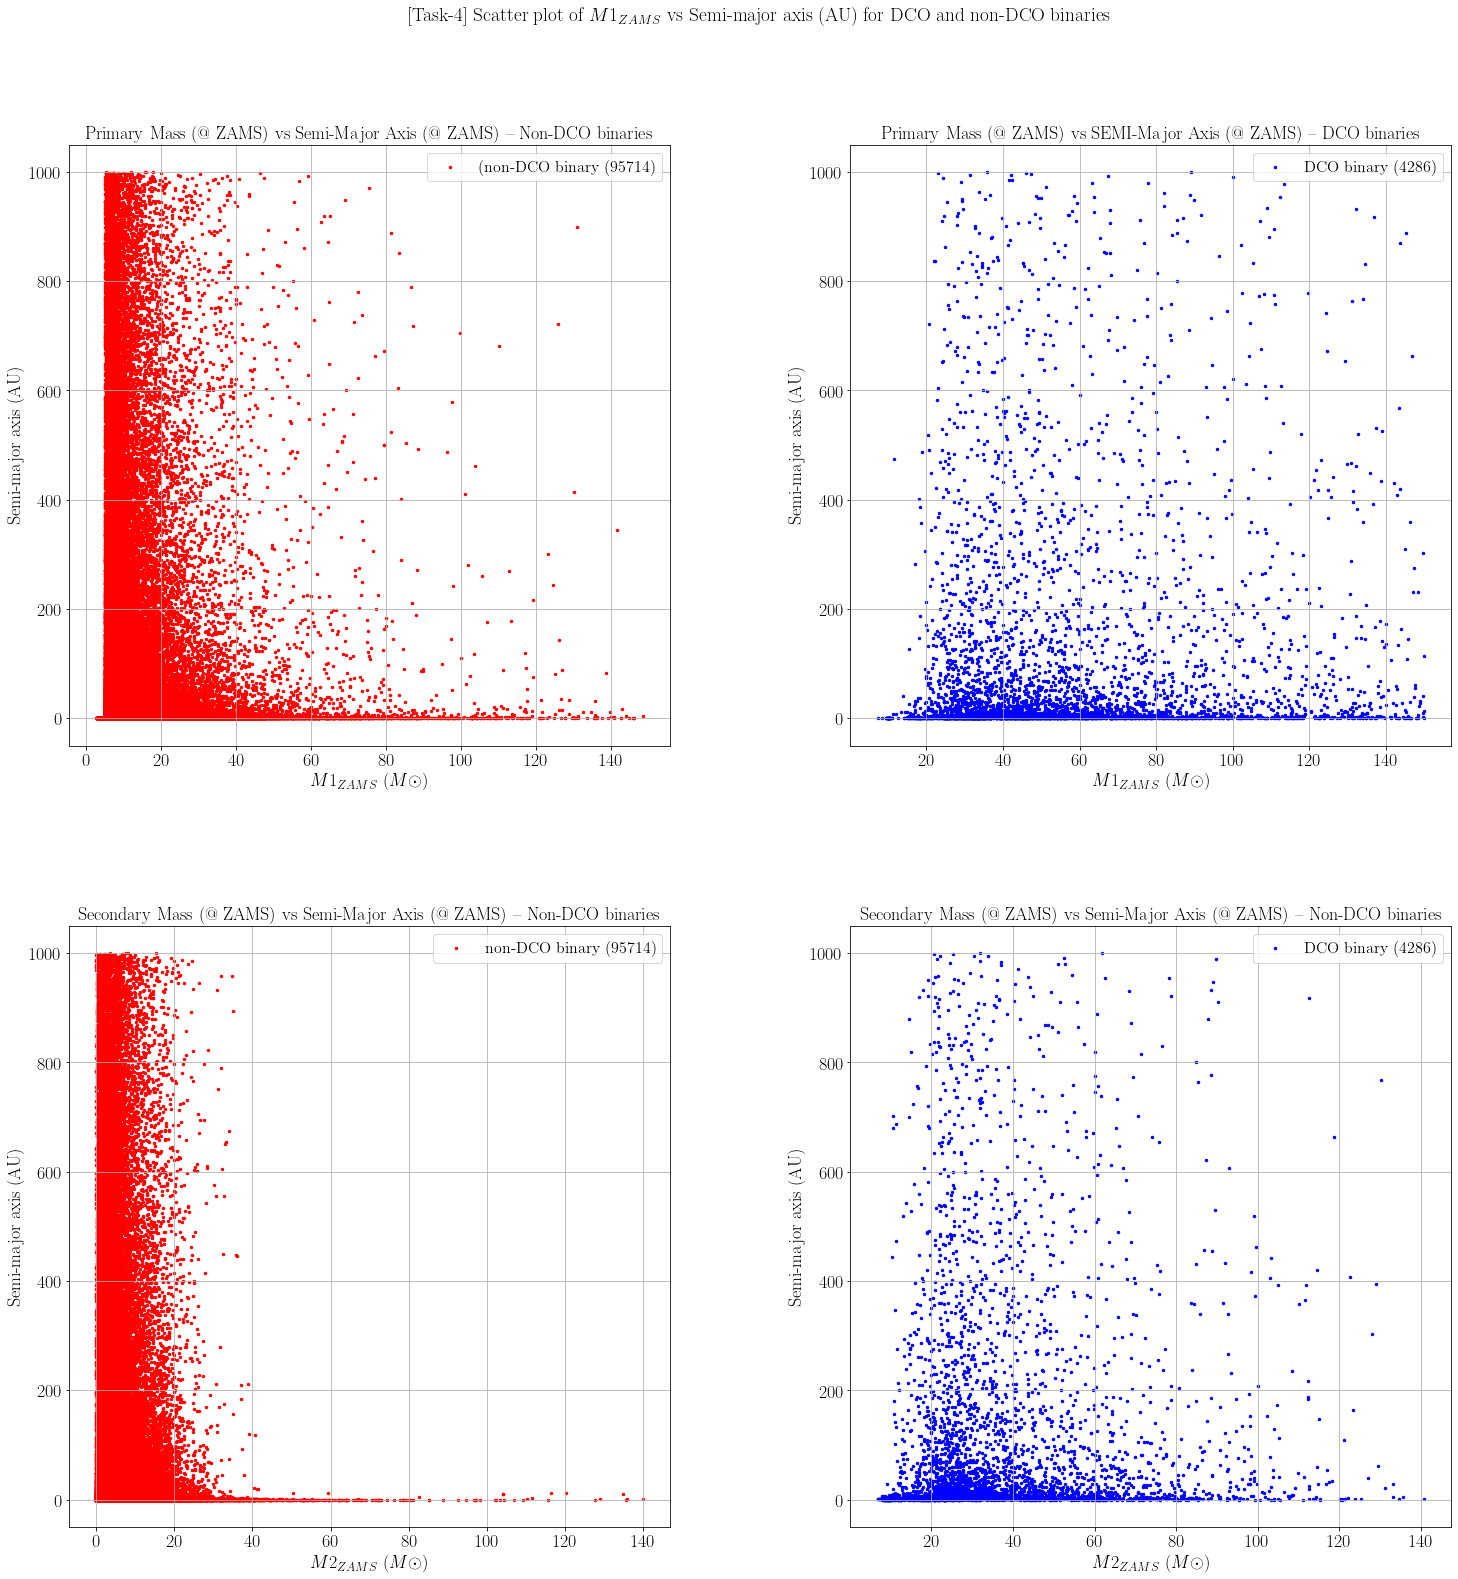

In [24]:
# PLOTTING M1@ZAMS VS SMA@ZAMS AND M2@ZAMS VS SMA@ZAMS
fig, axs = plt.subplots(2, 2, figsize=(24, 24))
axs[0,0].scatter(mass1_noDC_zams, sma_noDC, c='red', label=f'(non-DCO binary ({len(seeds_noDC_indices)})',s=6)
axs[0,0].set_xlabel('$M1_{ZAMS}$ ($M \odot$)')
axs[0,0].set_ylabel('Semi-major axis (AU)')
axs[0,0].legend()
axs[0,0].set_title(f'Primary Mass (@ ZAMS) vs Semi-Major Axis (@ ZAMS) -- Non-DCO binaries')
axs[0,0].grid(True)

axs[0,1].scatter(mass1_DC_zams, sma_DC, c='blue', label=f'DCO binary ({len(seedsDC)})',s=6)
axs[0,1].set_xlabel('$M1_{ZAMS}$ ($M \odot$)')
axs[0,1].set_ylabel('Semi-major axis (AU)')
axs[0,1].legend()
axs[0,1].set_title(f'Primary Mass (@ ZAMS) vs SEMI-Major Axis (@ ZAMS) -- DCO binaries')
axs[0,1].grid(True)

axs[1,0].scatter(mass2_noDC_zams, sma_noDC, c='red', label=f'non-DCO binary ({len(seeds_noDC_indices)})',s=6)
axs[1,0].set_xlabel('$M2_{ZAMS}$ ($M \odot$)')
axs[1,0].set_ylabel('Semi-major axis (AU)')
axs[1,0].legend()
axs[1,0].set_title(f'Secondary Mass (@ ZAMS) vs Semi-Major Axis (@ ZAMS) -- Non-DCO binaries')
axs[1,0].grid(True)

axs[1,1].scatter(mass2_DC_zams, sma_DC, c='blue', label=f'DCO binary ({len(seedsDC)})',s=6)
axs[1,1].set_xlabel('$M2_{ZAMS}$ ($M \odot$)')
axs[1,1].set_ylabel('Semi-major axis (AU)')
axs[1,1].legend()
axs[1,1].set_title(f'Secondary Mass (@ ZAMS) vs Semi-Major Axis (@ ZAMS) -- Non-DCO binaries')
axs[1,1].grid(True)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle('[Task-4]   Scatter plot of $M1_{ZAMS}$ vs Semi-major axis (AU) for DCO and non-DCO binaries')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
fig.savefig('./newTask-4/M1_vs_SMA_subplots_DCO_AND_NON-DCO.jpeg', dpi=300)
fig.savefig('/home/rsgr/lukog/plots/task4/M1_vs_SMA_subplots_DCO_AND_NON-DCO.jpeg', dpi=300)
plt.show()


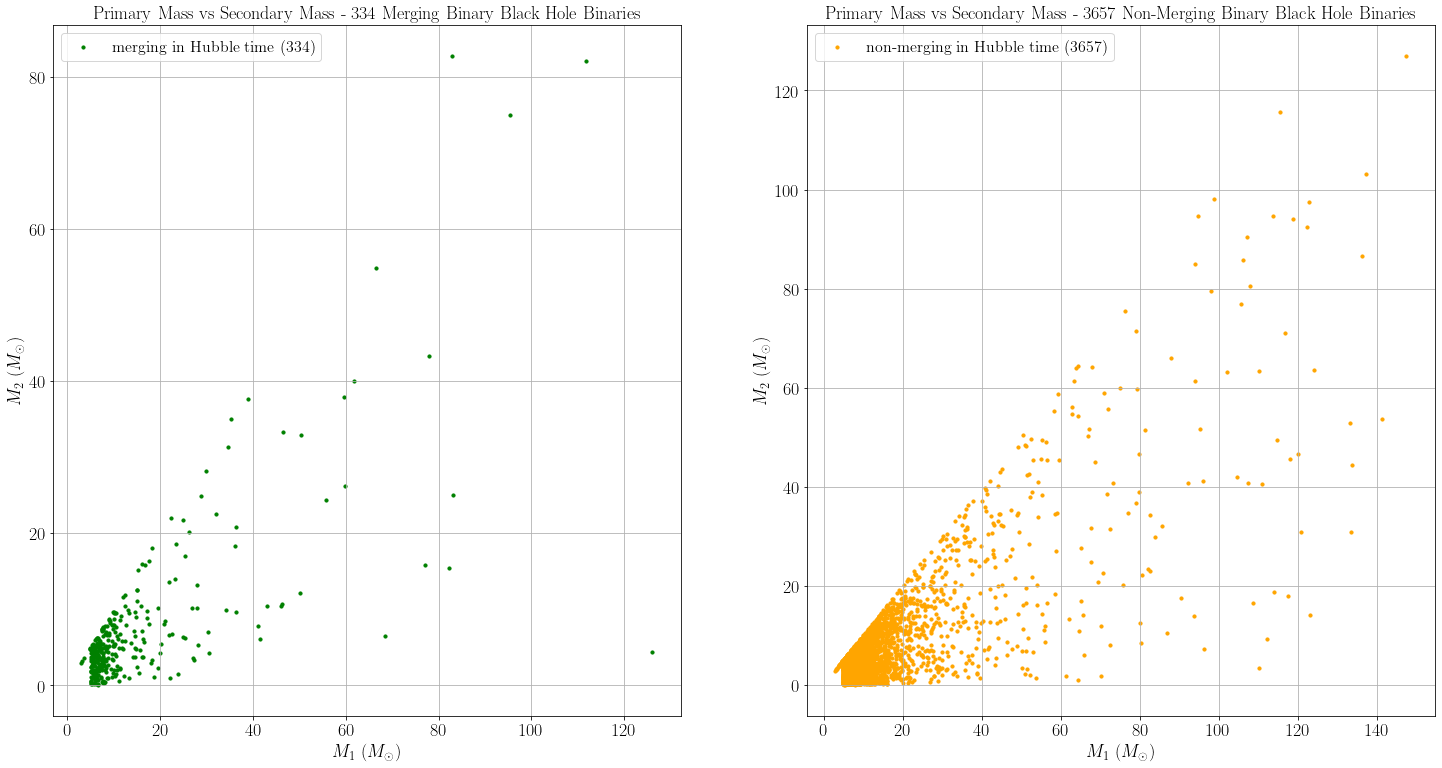

In [25]:
# PLOT bh-bh m1_zams
mass1_bh_hubble_zams = [mass1_syspar_zams[i] for i in bh_bh_hubble_indices]
mass2_bh_hubble_zams = [mass2_syspar_zams[i] for i in bh_bh_hubble_indices]
mass1_bh_non_hubble_zams = [mass1_syspar_zams[i] for i in bh_bh_non_hubble_indices]
mass2_bh_non_hubble_zams = [mass2_syspar_zams[i] for i in bh_bh_non_hubble_indices]

fig,axs = plt.subplots(1,2,figsize=(24,12))
axs[0].scatter(mass1_bh_hubble_zams,mass2_bh_hubble_zams,label=f'merging in Hubble time ({len(bh_bh_hubble_indices)})',c='green',s=10)
axs[0].legend()
axs[0].set_title(f'Primary Mass vs Secondary Mass - {len(bh_bh_hubble_indices)} Merging Binary Black Hole Binaries')
axs[0].set_xlabel("$M_{1}$ ($M_\odot$)")
axs[0].set_ylabel("$M_{2}$ ($M_\odot$)")
axs[0].grid(True)

axs[1].scatter(mass1_bh_non_hubble_zams,mass2_bh_non_hubble_zams,label=f'non-merging in Hubble time ({len(bh_bh_non_hubble_indices)})',c='orange',s=10)
axs[1].legend()
axs[1].set_title(f'Primary Mass vs Secondary Mass - {len(bh_bh_non_hubble_indices)} Non-Merging Binary Black Hole Binaries')
axs[1].set_xlabel("$M_1$ ($M_\odot$)")
axs[1].set_ylabel("$M_{2}$ ($M_\odot$)")
axs[1].grid(True)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
fig.savefig('./newTask-4/BBH_merging_vs_non_merging_ZAMS_M1_M2.jpeg',dpi=300)

fig.savefig('/home/rsgr/lukog/plots/task4/BBH_merging_vs_non_merging_ZAMS_M1_M2.jpeg',dpi=300)

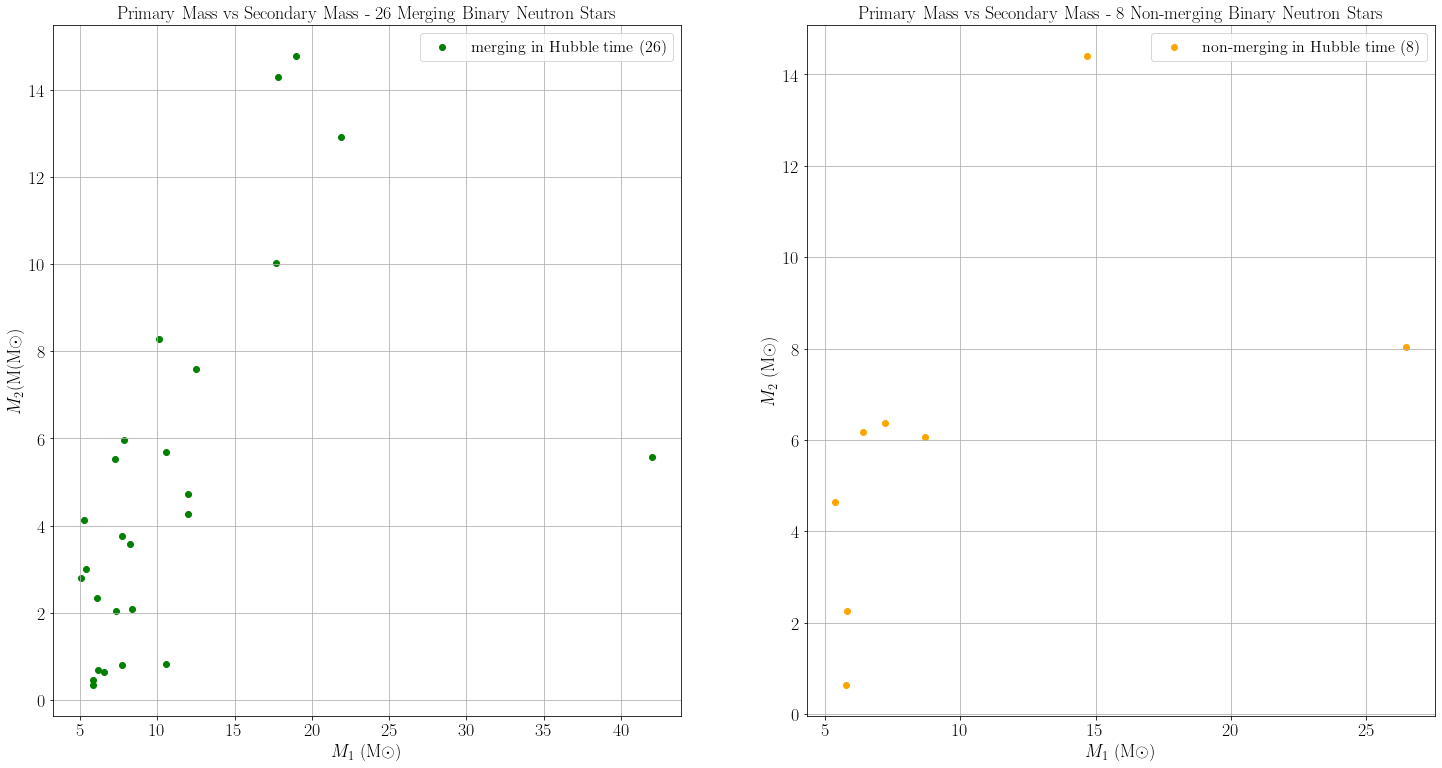

In [26]:
# PLOT ns-ns m1_zams
mass1_ns_hubble_zams = [mass1_syspar_zams[i] for i in ns_ns_hubble_indices]
mass2_ns_hubble_zams = [mass2_syspar_zams[i] for i in ns_ns_hubble_indices]
mass1_ns_non_hubble_zams = [mass1_syspar_zams[i] for i in ns_ns_non_hubble_indices]
mass2_ns_non_hubble_zams = [mass2_syspar_zams[i] for i in ns_ns_non_hubble_indices]

fig,axs = plt.subplots(1,2,figsize=(24,12))
axs[0].scatter(mass1_ns_hubble_zams,mass2_ns_hubble_zams,label=f'merging in Hubble time ({len(ns_ns_hubble_indices)})',c='green')
axs[0].legend()
axs[0].set_title(f'Primary Mass vs Secondary Mass - {len(ns_ns_hubble_indices)} Merging Binary Neutron Stars')
axs[0].set_xlabel("$M_{1}$ (M$\odot$)")
axs[0].set_ylabel("$M_{2}$(M(M$\odot$)")
axs[0].grid(True)

axs[1].scatter(mass1_ns_non_hubble_zams,mass2_ns_non_hubble_zams,label=f'non-merging in Hubble time ({len(ns_ns_non_hubble_indices)})',c='orange')
axs[1].legend()
axs[1].set_title(f'Primary Mass vs Secondary Mass - {len(ns_ns_non_hubble_indices)} Non-merging Binary Neutron Stars')
axs[1].set_xlabel("$M_1$ (M$\odot$)")
axs[1].set_ylabel("$M_2$ (M$\odot$)")
axs[1].grid(True)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
fig.savefig('./newTask-4/NS-NS_merging_vs_non_merging_ZAMS_M1_M2.jpeg',dpi=300)

fig.savefig('/home/rsgr/lukog/plots/task4/NS-NS_merging_vs_non_merging_ZAMS_M1_M2.jpeg',dpi=300)

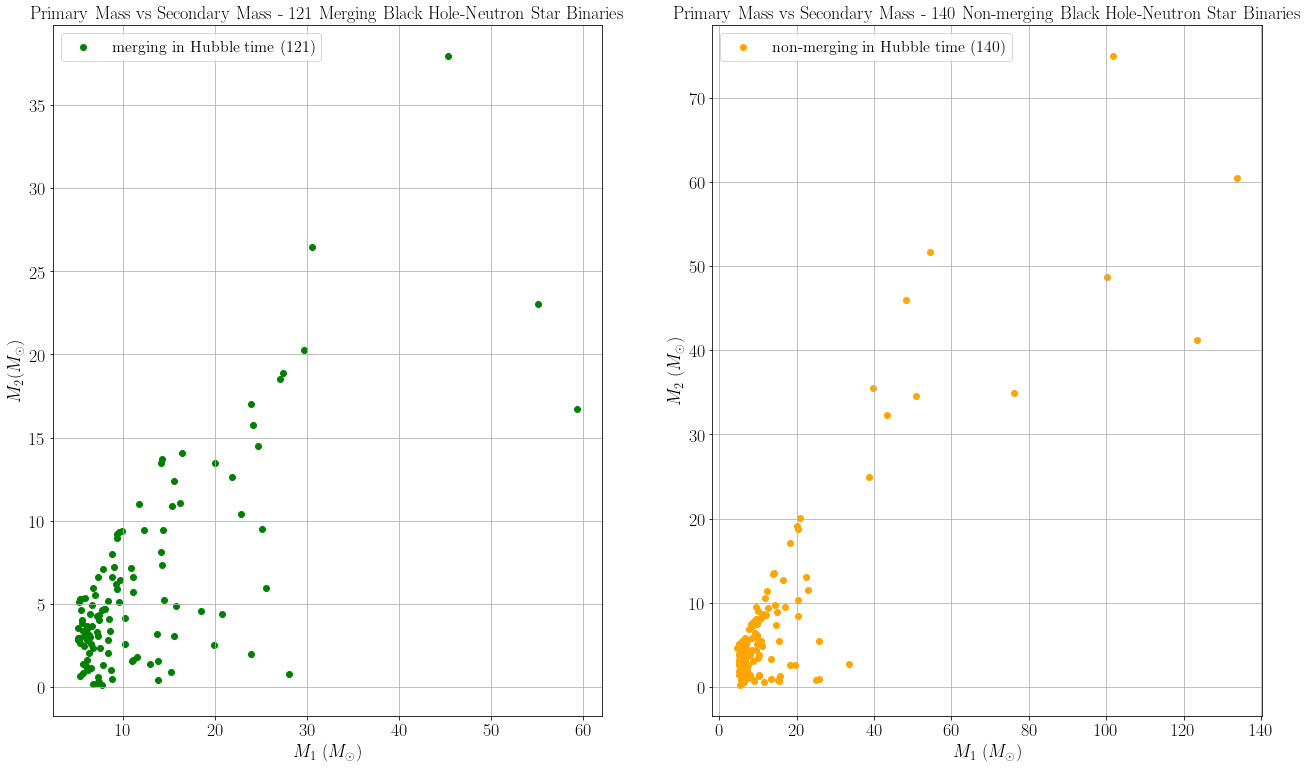

In [27]:
# PLOT bh-ns m1_zams
mass1_bh_ns_hubble_zams = [mass1_syspar_zams[i] for i in bh_ns_hubble_indices]
mass2_bh_ns_hubble_zams = [mass2_syspar_zams[i] for i in bh_ns_hubble_indices]
mass1_bh_ns_non_hubble_zams = [mass1_syspar_zams[i] for i in bh_ns_non_hubble_indices]
mass2_bh_ns_non_hubble_zams = [mass2_syspar_zams[i] for i in bh_ns_non_hubble_indices]

fig,axs = plt.subplots(1,2,figsize=(24,12))
axs[0].scatter(mass1_bh_ns_hubble_zams,mass2_bh_ns_hubble_zams,label=f'merging in Hubble time ({len(bh_ns_hubble_indices)})',c='green')
axs[0].legend()
axs[0].set_title(f'Primary Mass vs Secondary Mass - {len(bh_ns_hubble_indices)} Merging Black Hole-Neutron Star Binaries')
axs[0].set_xlabel("$M_{1}$ ($M_\odot$)")
axs[0].set_ylabel("$M_{2}$($M_\odot$)")
axs[0].grid(True)

axs[1].scatter(mass1_bh_ns_non_hubble_zams,mass2_bh_ns_non_hubble_zams,label=f'non-merging in Hubble time ({len(bh_ns_non_hubble_indices)})',c='orange')
axs[1].legend()
axs[1].set_title(f'Primary Mass vs Secondary Mass - {len(bh_ns_non_hubble_indices)} Non-merging Black Hole-Neutron Star Binaries')
axs[1].set_xlabel("$M_1$ ($M_\odot$)")
axs[1].set_ylabel("$M_2$ ($M_\odot$)")
axs[1].grid(True)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
fig.savefig('./newTask-4/BH-NS_merging_vs_non_merging_ZAMS_M1_M2.jpeg',dpi=300)

fig.savefig('/home/rsgr/lukog/plots/task4/BH-NS_merging_vs_non_merging_ZAMS_M1_M2.jpeg',dpi=300)